In [1]:
### 1. 크롤링/전처리를 위한 필수 패키지 import ###

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### 2. 웹 크롤링 ###

url = "http://maple.inven.co.kr"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# 현재 진행하고 있는 메이플스토리 이벤트 정보
events = soup.find_all(class_="menuGroup bg event")

# 이벤트 제목 추출
title_list = []
for event in events:    
    titles = event.find_all("p", class_="ev_txt")
    for title in titles:
#         print(title.text)
        title_list.append(title.text)

print(title_list)

# 이벤트 날짜 추출
day_list = []
for event in events:
    days = event.find_all("p", class_="ev_day")
    for day in days:
#         print(day.text)
        day_list.append(day.text)
        
print(day_list)

# 이벤트 링크 추출
link_list = []
for event in events:
    links = event.find_all("a")
    for link in links:
        href = link.get("href")
#         print(href)
        link_list.append(href)

print(link_list)

['코코넛 스매시 챌린지', '트로피컬 어드벤처', '티스크의 식량 창고', '토옹의 기도', 'NEW AGE 제로백', '바람 주화 상점', '이덴티스크의 선물', '이덴티스크 탐험', '버닝 월드', ' PC방 접속 보상 이벤트', '하이퍼 버닝']
['7/13~8/30', '7/13~8/9', '7/13~8/9', '7/13~8/9', '7/13~8/30', '6/15~9/3', '6/15~8/30', '6/15~8/30', '6/15~8/31', '6/16~8/3', '6/15~8/30']
['https://www.inven.co.kr/board/maple/2314/7727', 'https://www.inven.co.kr/board/maple/2314/7726', 'https://www.inven.co.kr/board/maple/2314/7724', 'https://www.inven.co.kr/board/maple/2314/7723', 'https://www.inven.co.kr/board/maple/2314/7722', 'https://www.inven.co.kr/board/maple/2314/7651', 'https://www.inven.co.kr/board/maple/2314/7650', 'https://www.inven.co.kr/board/maple/2314/7646', 'https://www.inven.co.kr/board/maple/2314/7645', 'https://www.inven.co.kr/board/maple/2314/7642', 'https://www.inven.co.kr/board/maple/2314/7641']


In [3]:
### 3. 데이터 전처리 ###

# 이벤트 날짜를 시작날짜와 종료날짜로 분리하기
# 이벤트 날짜를 날짜 형태로 변환하기(yyyy-MM-dd)

from datetime import datetime, date

dates = day_list
start_date_list = []
end_date_list = []
remain_date_list = []

for date in dates:
    start_date, end_date = date.split("~")        
    start_date = datetime.strptime(start_date, "%m/%d").strftime("2023-%m-%d")
    end_date = datetime.strptime(end_date, "%m/%d").strftime("2023-%m-%d")
    print("Start Date:", start_date)    
    start_date_list.append(start_date)
    print("End Date:", end_date)
    end_date_list.append(end_date)
    
    # 남은 일수 계산
    remain_date = (datetime.strptime(end_date, "%Y-%m-%d") - datetime.today()).days
    remain_date_list.append(remain_date)

print()
print(start_date_list)
print(end_date_list)
print(remain_date_list)
print()

# 데이터프레임 제작

data = {
    "제목": title_list,
    "시작날짜": start_date_list,
    "종료날짜": end_date_list,
    "남은일수": remain_date_list,
    "링크주소": link_list
}

df = pd.DataFrame(data)

print(df)

# CSV파일로 저장
df.to_csv('maple_events.csv', index=False)

Start Date: 2023-07-13
End Date: 2023-08-30
Start Date: 2023-07-13
End Date: 2023-08-09
Start Date: 2023-07-13
End Date: 2023-08-09
Start Date: 2023-07-13
End Date: 2023-08-09
Start Date: 2023-07-13
End Date: 2023-08-30
Start Date: 2023-06-15
End Date: 2023-09-03
Start Date: 2023-06-15
End Date: 2023-08-30
Start Date: 2023-06-15
End Date: 2023-08-30
Start Date: 2023-06-15
End Date: 2023-08-31
Start Date: 2023-06-16
End Date: 2023-08-03
Start Date: 2023-06-15
End Date: 2023-08-30

['2023-07-13', '2023-07-13', '2023-07-13', '2023-07-13', '2023-07-13', '2023-06-15', '2023-06-15', '2023-06-15', '2023-06-15', '2023-06-16', '2023-06-15']
['2023-08-30', '2023-08-09', '2023-08-09', '2023-08-09', '2023-08-30', '2023-09-03', '2023-08-30', '2023-08-30', '2023-08-31', '2023-08-03', '2023-08-30']
[44, 23, 23, 23, 44, 48, 44, 44, 45, 17, 44]

                제목        시작날짜        종료날짜  남은일수  \
0      코코넛 스매시 챌린지  2023-07-13  2023-08-30    44   
1        트로피컬 어드벤처  2023-07-13  2023-08-09    23   
2  

In [4]:
# 그래프를 그리기 전 한글폰트 적용 (한글 깨짐 방지)

from matplotlib import font_manager

# 맑은 고딕 폰트 경로 설정 (PC 환경에 따라 다를 수 있음)
font_path = "C:/Windows/Fonts/malgun.ttf"

# 폰트 설정
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()

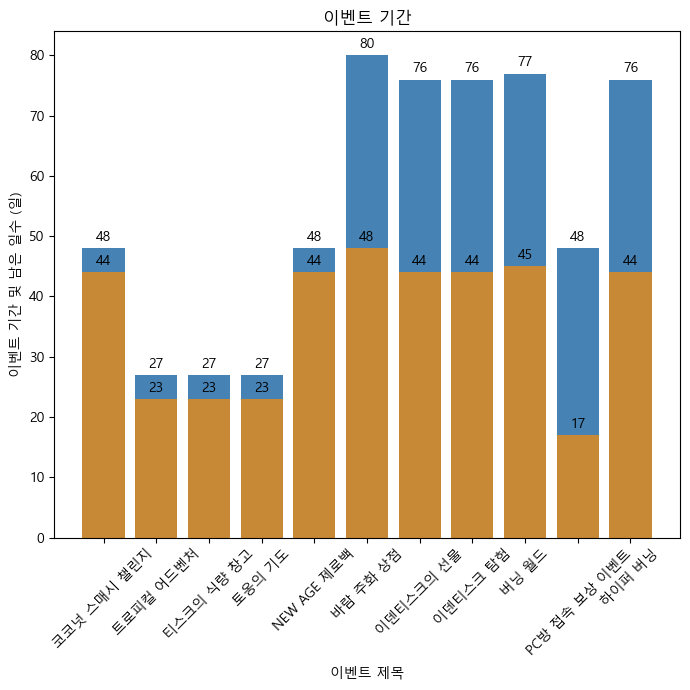

In [5]:
### 4. 그래프 그리기 ###


# CSV파일 불러오기
df = pd.read_csv('maple_events.csv')

# 그래프 1: Bar Graph
fig, ax = plt.subplots(figsize=(7, 7))

# 이벤트 기간 막대 그래프
bars = ax.bar(df['제목'], (pd.to_datetime(df['종료날짜']) - pd.to_datetime(df['시작날짜'])).dt.days, color='steelblue')
plt.xlabel('이벤트 제목')
plt.ylabel('이벤트 기간 (일)')
plt.title('이벤트 기간')
plt.xticks(rotation=45)

# 남은 일수 막대 그래프 (겹쳐 그리기)
remain_bars = ax.bar(df['제목'], df['남은일수'], color='darkorange', alpha=0.7)
ax.set_ylabel('이벤트 기간 및 남은 일수 (일)')

# 막대 위에 숫자 표시
for bar, remain_bar in zip(bars, remain_bars):
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 숫자와 그래프 간 간격 지정
                textcoords="offset points",
                ha='center', va='bottom')
    
    remain_height = remain_bar.get_height()
    ax.annotate(f'{remain_height}', xy=(remain_bar.get_x() + remain_bar.get_width() / 2, remain_height),
                xytext=(0, 3),  # 숫자와 그래프 간 간격 지정
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()